## Visualization of The Dataset

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [2]:
from Functions import load_realwaste_dataset
data_dir = "../realwaste-main/RealWaste"

X_train, X_test, y_train, y_test, class_names = load_realwaste_dataset(
    data_dir=data_dir,
    img_size=(128, 128),  
    test_size=0.2,        
    random_state=42,
    grayscale=False       
)

Loading images from dataset...
Loading 461 images from Cardboard...
Loading 411 images from Food Organics...
Loading 420 images from Glass...
Loading 790 images from Metal...
Loading 495 images from Miscellaneous Trash...
Loading 500 images from Paper...
Loading 921 images from Plastic...
Loading 318 images from Textile Trash...
Loading 436 images from Vegetation...

Dataset loaded:
Total images: 4752
Image shape: (128, 128, 3)
Number of classes: 9

Class distribution:
  Cardboard: 461 images
  Food Organics: 411 images
  Glass: 420 images
  Metal: 790 images
  Miscellaneous Trash: 495 images
  Paper: 500 images
  Plastic: 921 images
  Textile Trash: 318 images
  Vegetation: 436 images

Train set: 3801 images
Test set: 951 images

Train set class distribution:
  Cardboard: 369 images (9.7%)
  Food Organics: 329 images (8.7%)
  Glass: 336 images (8.8%)
  Metal: 632 images (16.6%)
  Miscellaneous Trash: 396 images (10.4%)
  Paper: 400 images (10.5%)
  Plastic: 736 images (19.4%)
  Textil

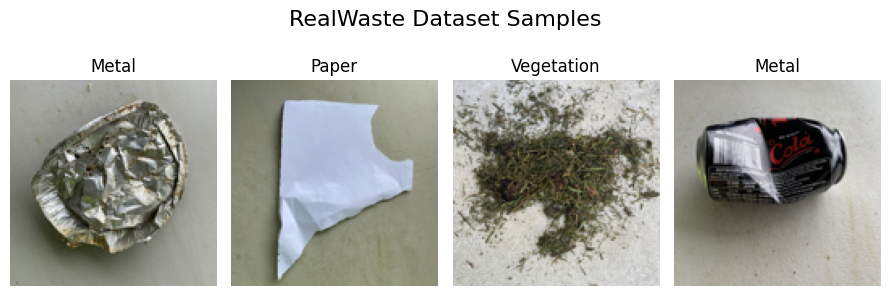

In [11]:
num_classes = len(class_names)

# Create a figure with rows=num_classes and cols=samples_per_class
ig, axes = plt.subplots(1, 4, figsize=(9, 3))
plt.suptitle("RealWaste Dataset Samples", fontsize=16, y=1.02)

for i, class_name in enumerate(class_names[:4]):
    ax = axes[i]
    img = X_train[i]
    label = class_names[y_train[i]]
    
    # Fix for grayscale channel if present (removes the last dimension)
    if img.ndim == 3 and img.shape[-1] == 1:
        img = img.squeeze()
        ax.imshow(img, cmap='gray')
    else:
        ax.imshow(img)
        
    ax.set_title(label)
    ax.axis('off')
        
plt.tight_layout()
plt.savefig("ExampleImages.png")
plt.show()

### Visualization of the augmented image

In [4]:
from Functions import augment_training_data
X_aug, y_aug = augment_training_data(X_train[1:2],y_train[1:2])

# Original image not needed in the Visualization
X_aug = np.delete(X_aug, 0, axis=0)

training set size:  1
Starting data augmentation...
Augmentation complete. Final training set size: 6


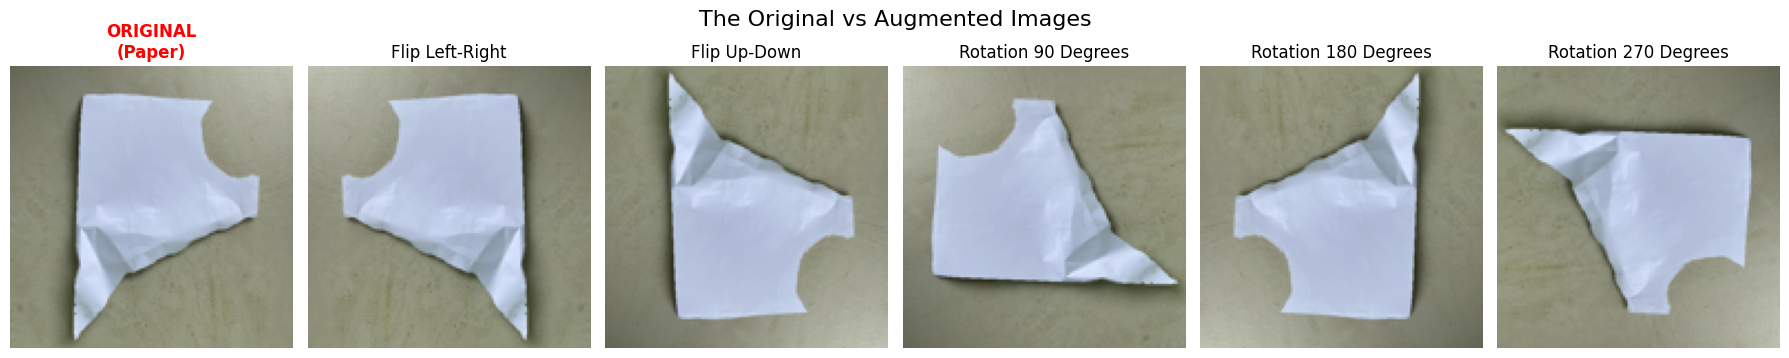

In [12]:

fig, axes = plt.subplots(1, 6, figsize=(18, 4))
plt.suptitle("The Original vs Augmented Images", fontsize=16, y=0.95)

ax = axes[0]
img_orig = X_train[1]  
label = class_names[y_train[1]]

# Handle grayscale
if img_orig.ndim == 3 and img_orig.shape[-1] == 1:
    ax.imshow(img_orig.squeeze(), cmap='gray')
else:
    ax.imshow(img_orig)

ax.set_title(f"ORIGINAL\n({label})", fontweight='bold', color='red')
ax.axis('off')


# --- 2. Plot The 5 Augmented Images (The Rest) ---

AugmentationLabel = ["Flip Left-Right","Flip Up-Down","Rotation 90 Degrees","Rotation 180 Degrees", "Rotation 270 Degrees"] 

for i in range(5):
    ax = axes[i+1]     # Start at column 1 (since 0 is original)
    img_aug = X_aug[i] # Take the first 5 augmented images
    
    # Handle grayscale
    if img_aug.ndim == 3 and img_aug.shape[-1] == 1:
        ax.imshow(img_aug.squeeze(), cmap='gray')
    else:
        ax.imshow(img_aug)
        
    ax.set_title(f"{AugmentationLabel[i]}")
    ax.axis('off')

plt.tight_layout()
plt.savefig("ExampleAugmentation.png")
plt.show()

## Visualization of Trainging the FFNN

## Visualization of Training the CNN


## Comparison of FFNN vs CNN on 128x128
Time used and the learning rate,
a critical discussion on why it is.

## Different Input sizes and RGB vs BW

### Struggle with 512x512

### 